<a href="https://colab.research.google.com/github/k9pranav/ML_learning_and_exp/blob/main/Dubai_property.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will be working with a Dataset that has data regarding property prices and property attributes of Dubai. 

I found the data set on Kaggle. Here is the link: https://www.kaggle.com/datasets/dataregress/dubai-properties-dataset

Like states in READ.ME, this notebook acts as a playground for me to deploy ML techniques and algos that I am learning. 

The reason I am putting it on Github is track and showcase my progress.

In [1]:
# Uploading the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import io

df = pd.read_csv('/content/drive/MyDrive/Datasets/properties_data.csv')
df = df.set_index('id')
df

,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
id,,,,,,,,,,,,,,,,,,,,,
5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,False,...,False,False,True,False,False,False,False,False,True,False
6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,False,...,False,False,True,True,False,False,False,False,True,False
6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,True,...,False,True,True,True,False,False,False,True,True,True
6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,False,...,False,False,False,False,False,False,False,False,False,False
6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,False,...,False,True,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705450,Mohammed Bin Rashid City,25.176892,55.310712,1500000,1087,1379.94,2,2,Ultra,False,...,False,True,True,True,True,True,True,True,True,True
7706287,Mohammed Bin Rashid City,25.166145,55.276684,1230000,760,1618.42,1,2,Medium,False,...,False,False,True,True,False,False,False,False,True,True
7706389,Dubai Creek Harbour (The Lagoons),25.206500,55.345056,2900000,1930,1502.59,3,5,Medium,True,...,False,False,False,True,False,False,False,False,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 5528049 to 7706643
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighborhood         1905 non-null   object 
 1   latitude             1905 non-null   float64
 2   longitude            1905 non-null   float64
 3   price                1905 non-null   int64  
 4   size_in_sqft         1905 non-null   int64  
 5   price_per_sqft       1905 non-null   float64
 6   no_of_bedrooms       1905 non-null   int64  
 7   no_of_bathrooms      1905 non-null   int64  
 8   quality              1905 non-null   object 
 9   maid_room            1905 non-null   bool   
 10  unfurnished          1905 non-null   bool   
 11  balcony              1905 non-null   bool   
 12  barbecue_area        1905 non-null   bool   
 13  built_in_wardrobes   1905 non-null   bool   
 14  central_ac           1905 non-null   bool   
 15  childrens_play_area  1905 non

<function matplotlib.pyplot.show>

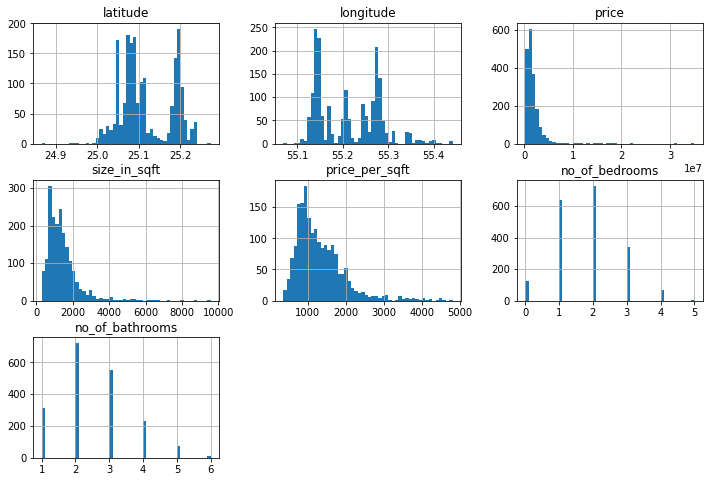

In [4]:
import matplotlib.pyplot as plt

df.hist(bins = 50, figsize = (12,8))
plt.show

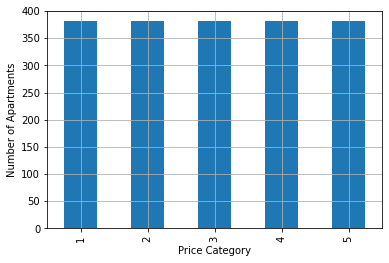

In [5]:
import numpy as np
df['size_cut'] = pd.qcut(df['size_in_sqft'], q = [0., 0.2, 0.4, 0.6, 0.8, 1.], labels = [1,2,3,4,5])

df['size_cut'].value_counts().sort_index().plot.bar(grid = True)
plt.xlabel('Price Category')
plt.ylabel('Number of Apartments')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(df, test_size = 0.2, stratify = df['size_cut'])

In [7]:
for i in (strat_train_set, strat_test_set):
  i.drop('size_cut', axis = 1, inplace=True)

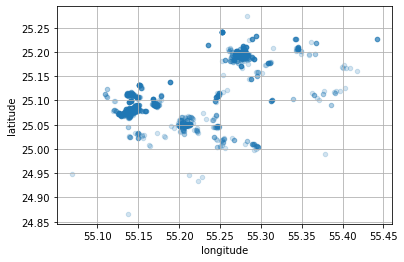

In [8]:
dubai = strat_train_set.copy()

dubai.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)
plt.show()

In [9]:
corr_matrix = dubai.corr()
corr_matrix['price'].sort_values()

pets_allowed          -0.139719
shared_pool           -0.101972
lobby_in_building     -0.099278
childrens_pool        -0.094375
childrens_play_area   -0.092966
security              -0.090100
vastu_compliant       -0.087158
networked             -0.083697
barbecue_area         -0.080690
shared_gym            -0.067701
walk_in_closet        -0.043179
kitchen_appliances    -0.026026
shared_spa            -0.024323
longitude             -0.015605
view_of_landmark      -0.008801
maid_service          -0.005073
study                 -0.004698
private_garden         0.009394
balcony                0.014488
covered_parking        0.020261
private_jacuzzi        0.032687
central_ac             0.047001
unfurnished            0.058239
view_of_water          0.063717
built_in_wardrobes     0.071429
maid_room              0.102803
concierge              0.111828
private_gym            0.135800
latitude               0.198247
private_pool           0.335699
no_of_bathrooms        0.496411
no_of_be

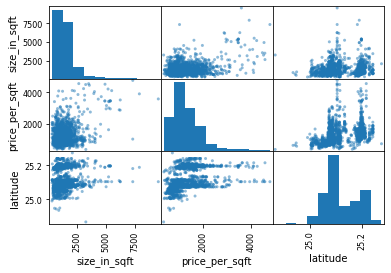

In [10]:
from pandas.plotting import scatter_matrix

attributes = ['private_pool', 'no_of_bathrooms', 'no_of_bedrooms', 'size_in_sqft']

scatter_matrix(dubai[['size_in_sqft', 'price_per_sqft', 'latitude']])
plt.show()

In [11]:
scale_mapper = {'Low':1, 'Medium':2, 'High': 3, 'Ultra': 4}

dubai['quality'] = df['quality'].replace(scale_mapper)



In [12]:
dubai_exp = dubai.copy()
from sklearn.metrics.pairwise import rbf_kernel

dubai_exp = rbf_kernel(dubai_exp[["latitude"]], [[25.075]], gamma=0.1)

dubai_exp



array([[0.99864593],
       [0.99984576],
       [0.99999674],
       ...,
       [0.99974387],
       [0.99999368],
       [0.99858417]])

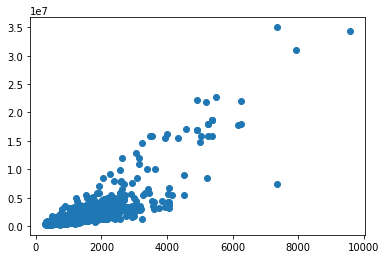

In [13]:
# Housing is dubai data, without the independent variable, price
# Housing label is just the price of column
housing = dubai.drop('price', axis = 1)
housing_label = dubai['price'].copy()

plt.scatter(housing['size_in_sqft'], housing_label)
plt.show()

In [14]:
# Feature Engineering: Standardization. Sometimes, the range of the values of the attributes 
# is too much/varied, which decreases the validity/accuracy of model/predictions
# so we scale the variables. Here I have used standardization to scale the values.
# Here, I have scaled both the dependent and independent variables

from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

some_new_data = dubai[['size_in_sqft']].iloc[:5]

model = TransformedTargetRegressor(LinearRegression(), 
                                   transformer = StandardScaler())

model.fit(housing[['size_in_sqft']], housing_label)
predictions = model.predict(some_new_data)

In [15]:
type(housing['size_in_sqft'])

pandas.core.series.Series

In [33]:
# Custom Transformers
# Sometimes, the transformation that are required while scaling may not be available. 
# So we have to create our own 
# Here, I have used Function Transformer

from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log)

log_size_sqft = log_transformer.transform(housing[['size_in_sqft']])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
# Creating a custom transformer using class
# Here, I have tried to create a custom class for min-max scaling
# between the range -1 and 1

class MinMaxScaleClone(BaseEstimator, TransformerMixin)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X = np.array([1,2,3,4,5,6,7,8])
y = np.array([1,5,10,15,27,38,51,66])

scale = StandardScaler()

scaler.fit(X.reshape(-1,1))
print(scaler.transform(X.reshape(-1,1)))



[[-1.52752523]
 [-1.09108945]
 [-0.65465367]
 [-0.21821789]
 [ 0.21821789]
 [ 0.65465367]
 [ 1.09108945]
 [ 1.52752523]]
